Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg

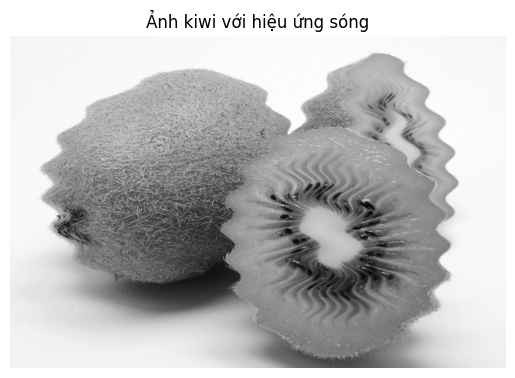

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt 

data = iio.imread('exercise/Kiwi-fruit.jpg', mode='F')
bdata = nd.shift(data, (30, 50))

# Lấy kích thước ảnh
rows, cols = data.shape

# Tạo lưới tọa độ gốc
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Tạo hiệu ứng sóng bằng hàm sin
amplitude = 20   # biên độ sóng
frequency = 2 * np.pi / 100  # tần số sóng

# Áp dụng biến dạng theo trục y
x_wave = x + amplitude * np.sin(frequency * y)
y_wave = y

# Biến đổi tọa độ
coords = np.array([y_wave, x_wave])
data_wave = nd.map_coordinates(data, coords, order=1, mode='reflect')

# Hiển thị kết quả
plt.imshow(data_wave, cmap='gray')
plt.title('Ảnh kiwi với hiệu ứng sóng')
plt.axis('off')
plt.show()

# Lưu kết quả
data_uint8 = (data_wave * 255).astype(np.uint8)
iio.imwrite('kiwi_wave.jpg', data_uint8)